In [75]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [76]:
import csv
import random
import torch
from numpy import pi
from torch import nn, optim
import math
from IPython import display
from matplotlib import pyplot as plt

import numpy as np
from numpy import arange, round, meshgrid, resize
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print("Using PyTorch Version %s" %torch.__version__)
np.random.seed(0)
torch.manual_seed(0)

Using PyTorch Version 1.6.0


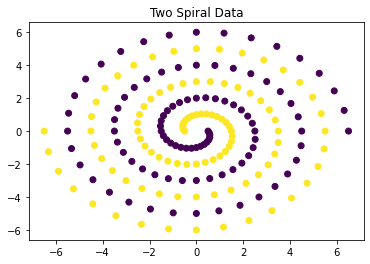

In [77]:
def read_two_spiral_file(filename="spiralsdataset.csv"):
    x = []
    y = []
    
    with open(filename) as csv_file:
        csv_reader = csv.reader(csv_file)
        for row in csv_reader:
            x.append(list(map(float, row[:-1])))
            y.append([int(v) for v in row[-1:]])

    return np.array(x), np.array(y)

x, y = read_two_spiral_file()       # x = all input coordinates; y = class labels

spiral_x = [i[0] for i in x]        # x coordinates
spiral_y = [i[1] for i in x]        # y coordinates

plt.scatter(spiral_x, spiral_y, c=y)
plt.title('Two Spiral Data')
plt.show()


In [78]:
# Split the data set into training and testing
data_train, data_test, labels_train, labels_test = train_test_split(
    x, y, test_size=0.2, random_state=2)

In [79]:
# Set iterations and number of plots shown
iterations = 1000                     
display_plot = 200            # controls iterations plotted

In [80]:
# Set network dimensions & layer sizes
inputs = x.shape[1]
layer1 = 16            
layer2 = 32            
output = 1              # Binary classification

In [81]:
# Build neural network
net = nn.Sequential(
    nn.Linear(inputs, layer1),
    nn.ELU(),
    nn.Linear(layer1, layer2),
    nn.ELU(),
    nn.Linear(layer2, output), nn.Sigmoid())
print(net)

Sequential(
  (0): Linear(in_features=2, out_features=16, bias=True)
  (1): ELU(alpha=1.0)
  (2): Linear(in_features=16, out_features=32, bias=True)
  (3): ELU(alpha=1.0)
  (4): Linear(in_features=32, out_features=1, bias=True)
  (5): Sigmoid()
)


In [82]:
# Set loss function & learning rate
loss_function = nn.BCELoss()
learning_rate = 0.1          
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

In [83]:
model_loss = []
model_accuracy = []

print('Shapes: ', y.shape, y.reshape(-1,1).shape)
y_torch = torch.FloatTensor(y).reshape(-1, 1)

x_torch = torch.FloatTensor(x)
print('Shapes: ',x_torch.shape, y_torch.shape)

Shapes:  (194, 1) (194, 1)
Shapes:  torch.Size([194, 2]) torch.Size([194, 1])


In [84]:
# Plot decision boundary of model
def decision_boundary(x):               
	min_x, max_x = x[:, 0].min()-0.1, x[:, 0].max()+0.1
	min_y, max_y = x[:, 1].min()-0.1, x[:, 1].max()+0.1
	distance = min(max_x - min_x, max_y - min_y) / 100
	X, Y = np.meshgrid(np.arange(min_x, max_x, distance),np.arange(min_y, max_y, distance))
	input_data = np.hstack((X.ravel().reshape(-1,1),Y.ravel().reshape(-1,1)))
	input_data_torch = torch.FloatTensor(input_data)
	decision_prob = net(input_data_torch)
	decision = np.where(decision_prob<0.5,0,1)
	Z = decision.reshape(X.shape)
	return(plt.contourf(X, Y, Z, cmap=plt.cm.PiYG, alpha=0.6))

 Iteration:  0  Loss: 0.7127  Accuracy: 0.4948453608247423


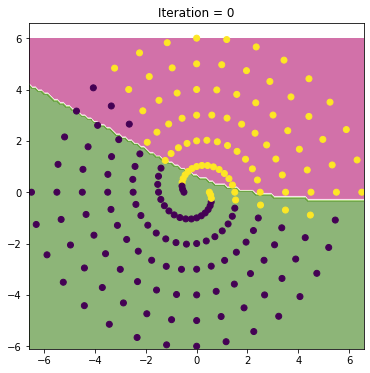

 Iteration:  200  Loss: 0.4696  Accuracy: 0.7061855670103093


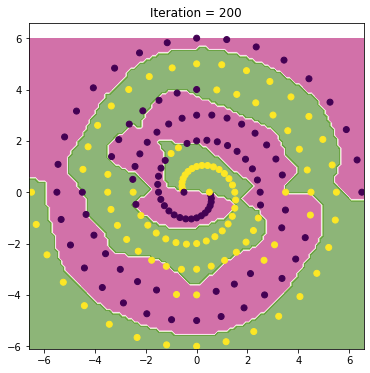

 Iteration:  400  Loss: 0.0076  Accuracy: 1.0


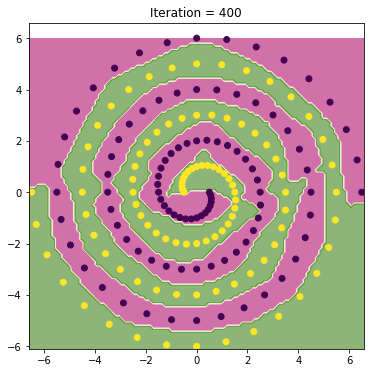

 Iteration:  600  Loss: 0.0011  Accuracy: 1.0


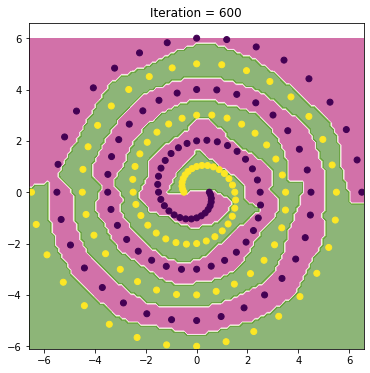

 Iteration:  800  Loss: 0.0005  Accuracy: 1.0


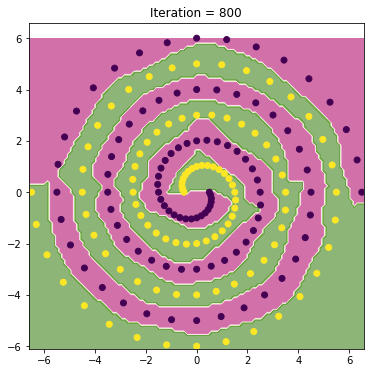

Model Loss: 0.0003


In [85]:
for i in range(iterations):
    y_class = net(x_torch)    # predict
    y_class_round = y_class.round()
    
    predictions = [] # test
    labels = [] # test
    predictions.append(y_class) # test
    labels.append(y) # test

    loss = loss_function(y_class,y_torch)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    y_class_class = np.where(y_class.detach().numpy()<0.5, 0, 1)
    accuracy = np.sum(y.reshape(-1,1)==y_class_class) / len(y)
    model_accuracy.append(accuracy)
    model_loss.append(loss.item())

    if i%display_plot == 0:
    	print(' Iteration: ', i, ' Loss: {:.4f}'.format(loss.item()),' Accuracy:', accuracy)
    	y_class_final =  y_class_round.detach().numpy().reshape(194) 
    	header = 'Iteration = {}'.format(i)
    	plt.figure(figsize=(6,6))
    	plt.title(header)
    	b = decision_boundary(x)
    	plt.scatter(x[:,0], x[:,1], c=y_class_final)

    	plt.show(block=False)
    	plt.pause(0.2)
    	plt.close()

x = torch.FloatTensor(x)
y_torch = torch.FloatTensor(y_torch).reshape(-1, 1)
y_class = net(x)
loss_test = loss_function(y_class,y_torch)

predictions = [] #
labels = [] #
predictions.append(y_class) #
labels.append(y) #
predict_y = torch.cat(predictions).round() #
labels_test = y_torch #

print('Model Loss: {:.4f}'.format(loss_test.item()))

#####################################
Prediction accuracy 1.0
Macro precision 1.0
Micro precision 1.0
Macro recall 1.0
Micro recall 1.0
#####################################
Model Accuracy: 1.000
Model Loss: 0.000
#####################################


Text(0.5, 0, 'Iterations')

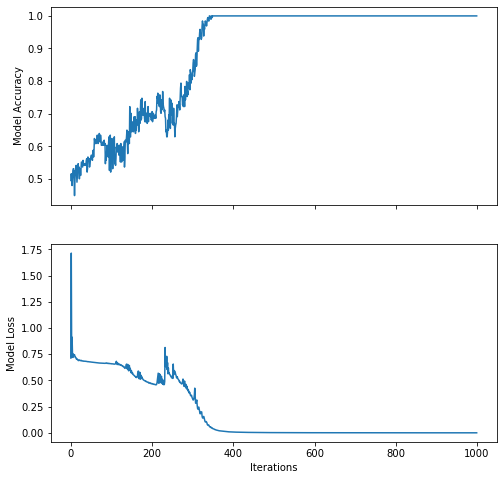

In [86]:
print('#####################################')
print ('Prediction accuracy', accuracy_score(labels_test.data, predict_y.data))
print ('Macro precision', precision_score(labels_test.data, predict_y.data, average='macro'))
print ('Micro precision', precision_score(labels_test.data, predict_y.data, average='micro'))
print ('Macro recall', recall_score(labels_test.data, predict_y.data, average='macro'))
print ('Micro recall', recall_score(labels_test.data, predict_y.data, average='micro'))
print('#####################################')
print('Model Accuracy: {:.3f}'.format(accuracy))
print('Model Loss: {:.3f}'.format(loss))
print('#####################################')
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 8), sharex=True)

ax1.plot(model_accuracy)
ax1.set_ylabel("Model Accuracy")
ax2.set_xlabel("Iterations")
ax2.plot(model_loss)
ax2.set_ylabel("Model Loss")
ax2.set_xlabel("Iterations")

In [87]:
print("Classification report: ANN Model")
print()

print(classification_report(labels_test.data, predict_y.data))
print()


print("Confusion Matrix: SVM Model")
print()
print(confusion_matrix(labels_test.data, predict_y.data))


Classification report: ANN Model

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        97
         1.0       1.00      1.00      1.00        97

    accuracy                           1.00       194
   macro avg       1.00      1.00      1.00       194
weighted avg       1.00      1.00      1.00       194


Confusion Matrix: SVM Model

[[97  0]
 [ 0 97]]


# SVM Model 

In [88]:
from sklearn.svm import SVC
from numpy import arange, round, meshgrid, resize
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [89]:
# Test model using test data
svm = SVC(C=0.6, kernel='rbf', gamma=0.9)
svm = SVC(C=1, kernel='rbf', gamma=0.1)
svm.fit(data_train, labels_train.flatten())
accuracy = svm.score(data_test, labels_test)
print('Model test accuracy:',accuracy*100,'%')

ValueError: Found input variables with inconsistent numbers of samples: [194, 39]

In [ ]:
#set up parameters to iterate over
parameters = {'kernel':('linear', 'rbf'),
                'C':[0.0001, 0.001, 0.01, 0.1, 0.6, 1],
                'gamma':[0.0001, 0.001, 0.01, 0.9, 0.1, 1]
              }

clf = GridSearchCV(SVC(), parameters)
clf.fit(data_train, labels_train.flatten()) #iterate over all configurations
print("Best parameters:", clf.best_params_)

In [ ]:
# Visualise activations
activation_range = arange(-6,6,0.1) # interval of [-6,6) with step size 0.1
coordinates = [(x,y) for x in activation_range for y in activation_range]
classifications = svm.predict(coordinates)
data_test, labels_test = meshgrid(activation_range, activation_range)
plt.scatter(data_test, labels_test, c=['tab:blue' if x > 0 else 'tab:orange' for x in classifications])
plt.title('Two Spiral SVM')
plt.show()

In [ ]:
print("Classification report: SVM Model")
print()

y_true, y_pred = labels_test, svm.predict(data_test)
print(classification_report(y_true, y_pred))
print()


print("Confusion Matrix: SVM Model")
print()
print(confusion_matrix(y_true, y_pred))
